In [22]:
#pip install jupyterthemes


In [23]:
#!jt -t chesterish
#!jt -r

In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import glob as gb
import pathlib
import os
import re
import string 
import ast
from collections import Counter 


%matplotlib inline

import seaborn as sns

from numpy import mean


from sklearn.preprocessing import StandardScaler

#  NLTK Libraries
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


pd.set_option('display.max_columns', None)


In [25]:
df = pd.read_csv(r"C:\Users\farhanhasan\PycharmProjects\Omdena\Multimodel_Lung_Disease_ML\Data\PADCHEST_chest_x_ray_images_labels.csv")


df.head()

C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_27556\3409741853.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\farhanhasan\PycharmProjects\Omdena\Multimodel_Lung_Disease_ML\Data\PADCHEST_chest_x_ray_images_labels.csv")


,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2092,2251,1728,1872,250,2,2500,10,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2631,2065,3296,3236,400,10,10000,25,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2155,2880,3572,3732,320,3,3200,10,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2472,2325,3584,3240,400,3,3200,8,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
4,4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2853,1871,3732,2908,320,6,6400,20,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']


# DATASET DESCRIPTION

>PadChest is a labeled large-scale, high resolution chest x-ray dataset for the automated exploration of medical images along with their associated reports. This dataset includes more than 160,000 images obtained from 67,000 patients that were interpreted and reported by radiologists at Hospital San Juan Hospital (Spain) from 2009 to 2017, covering six different position views and additional information on image acquisition and patient demography. The reports were labeled with 174 different radiographic findings, 19 differential diagnoses and 104 anatomic locations organized as a hierarchical taxonomy and mapped onto standard Unified Medical Language System (UMLS) terminology. Of these reports, 27% were manually annotated by trained physicians and the remaining set was labeled using a supervised method based on a recurrent neural network with attention mechanisms. The labels generated were then validated in an independent test set achieving a 0.93 Micro-F1 score.

>Thoughts: Right off the bat we see that 27% of the data us useful to us, as manually labeled data is what we need.

In [26]:
df["MethodLabel"].unique()

array(['Physician', 'RNN_model'], dtype=object)

In [27]:
df_2 = df[df["MethodLabel"] == 'Physician'].copy()

In [28]:
df_2.shape

(39053, 36)

In [29]:
df_2.groupby("Projection")["ImageDir"].agg('count')

Projection
AP                 575
AP_horizontal     1896
COSTAL              13
L                12608
PA               23961
Name: ImageDir, dtype: int64

In [30]:
num_duplicates = df_2[df_2["Projection"] == "L"].duplicated(subset=["PatientID"]).sum()


In [31]:
num_duplicates


612

# DATA CLEANING

> Check Null values

In [32]:
#Check percentage of total data which is null. 
df_2.isna().sum()/df_2.shape[0]*100

Unnamed: 0                          0.000000
ImageID                             0.000000
ImageDir                            0.000000
StudyDate_DICOM                     0.000000
StudyID                             0.000000
PatientID                           0.000000
PatientBirth                        0.000000
PatientSex_DICOM                    0.000000
ViewPosition_DICOM                 45.412644
Projection                          0.000000
MethodProjection                    0.000000
Pediatric                           0.000000
Modality_DICOM                      0.000000
Manufacturer_DICOM                  0.000000
PhotometricInterpretation_DICOM     0.000000
PixelRepresentation_DICOM           0.000000
PixelAspectRatio_DICOM              0.000000
SpatialResolution_DICOM             0.000000
BitsStored_DICOM                    0.000000
WindowCenter_DICOM                  0.000000
WindowWidth_DICOM                   0.000000
Rows_DICOM                          0.000000
Columns_DI

In [33]:

df_2.drop("ViewPosition_DICOM", axis = 1, inplace = True)

# FEATURE ENG

In [34]:
import datetime

current_year = datetime.datetime.now().year
current_year

2023

In [35]:
df_2["StudyDate_DICOM"] = pd.to_datetime(df["StudyDate_DICOM"], format='%Y%m%d', errors='ignore')

In [36]:
df_2["StudyDate_DICOM"]

0       2014-09-15
1       2015-09-14
2       2015-09-14
3       2015-07-17
4       2015-07-17
           ...    
39048   2016-02-16
39049   2016-02-16
39050   2016-02-19
39051   2016-02-19
39052   2016-12-21
Name: StudyDate_DICOM, Length: 39053, dtype: datetime64[ns]

In [37]:
df_2["StudyYear"] = df_2["StudyDate_DICOM"].dt.year

In [38]:
df_2["StudyYear"]

0        2014
1        2015
2        2015
3        2015
4        2015
         ... 
39048    2016
39049    2016
39050    2016
39051    2016
39052    2016
Name: StudyYear, Length: 39053, dtype: int64

In [39]:
df_2["Age"] = df_2["StudyYear"] - df_2["PatientBirth"]

df_2.head()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,Projection,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS,StudyYear,Age
0,0,20536686640136348236148679891455886468_k6ga29.png,0,2014-09-15,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2092,2251,1728,1872,250,2,2500,10,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[],2014,84.0
1,1,135803415504923515076821959678074435083_fzis7d...,0,2015-09-14,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2631,2065,3296,3236,400,10,10000,25,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378'],2015,86.0
2,2,135803415504923515076821959678074435083_fzis7b...,0,2015-09-14,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2155,2880,3572,3732,320,3,3200,10,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378'],2015,86.0
3,3,113855343774216031107737439268243531979_3k951l...,0,2015-07-17,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2472,2325,3584,3240,400,3,3200,8,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151'],2015,90.0
4,4,113855343774216031107737439268243531979_3k951n...,0,2015-07-17,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2853,1871,3732,2908,320,6,6400,20,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151'],2015,90.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

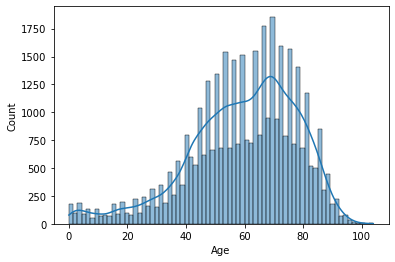

In [40]:
sns.histplot(data= df_2, x = "Age", kde=True)

<AxesSubplot:xlabel='PatientSex_DICOM', ylabel='count'>

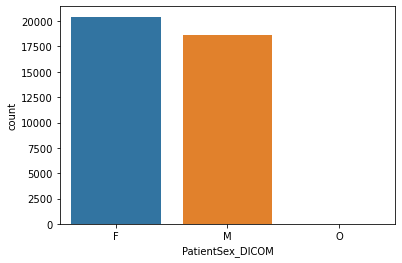

In [42]:
sns.countplot(data = df_2, x = "PatientSex_DICOM")

In [43]:
df_2.dropna(subset = ["Labels"], inplace = True)

In [44]:
df_2['Labels'] = df_2['Labels'].apply(ast.literal_eval)


In [45]:




keywords = [keyword for diagnoses_list in df_2["Labels"] for keyword in diagnoses_list ]




In [46]:
keywords

['normal',
 'pulmonary fibrosis',
 'chronic changes',
 'kyphosis',
 'pseudonodule',
 'ground glass pattern',
 'pulmonary fibrosis',
 'chronic changes',
 'kyphosis',
 'pseudonodule',
 'ground glass pattern',
 'chronic changes',
 'chronic changes',
 'unchanged',
 'alveolar pattern',
 'interstitial pattern',
 'laminar atelectasis',
 'pleural effusion',
 'apical pleural thickening',
 'suture material',
 'sternotomy',
 'laminar atelectasis',
 'pleural effusion',
 'apical pleural thickening',
 'suture material',
 'sternotomy',
 'unchanged',
 'alveolar pattern',
 'pleural effusion',
 'endotracheal tube',
 'unchanged',
 'sternotomy',
 'interstitial pattern',
 'pleural effusion',
 'infiltrates',
 'endotracheal tube',
 'sternotomy',
 'heart insufficiency',
 'pleural effusion',
 'sternotomy',
 'hemidiaphragm elevation',
 'infiltrates',
 'suture material',
 'superior mediastinal enlargement',
 'aortic elongation',
 'scoliosis',
 'sclerotic bone lesion',
 'supra aortic elongation',
 'vertebral dege

In [47]:
keyword_counts = pd.Series(keywords).value_counts()
keyword_counts

normal                  12694
COPD signs               4823
unchanged                4036
chronic changes          3885
cardiomegaly             3746
                        ...  
nephrostomy tube            3
double J stent              2
esophagic dilatation        2
breast mass                 1
lipomatosis                 1
Length: 193, dtype: int64

In [48]:
counts_df = pd.DataFrame(keyword_counts,  columns=['Frequency'])

In [49]:
counts_df.head()

,Frequency
normal,12694
COPD signs,4823
unchanged,4036
chronic changes,3885
cardiomegaly,3746


In [50]:
top_20_count = counts_df[:20].copy()

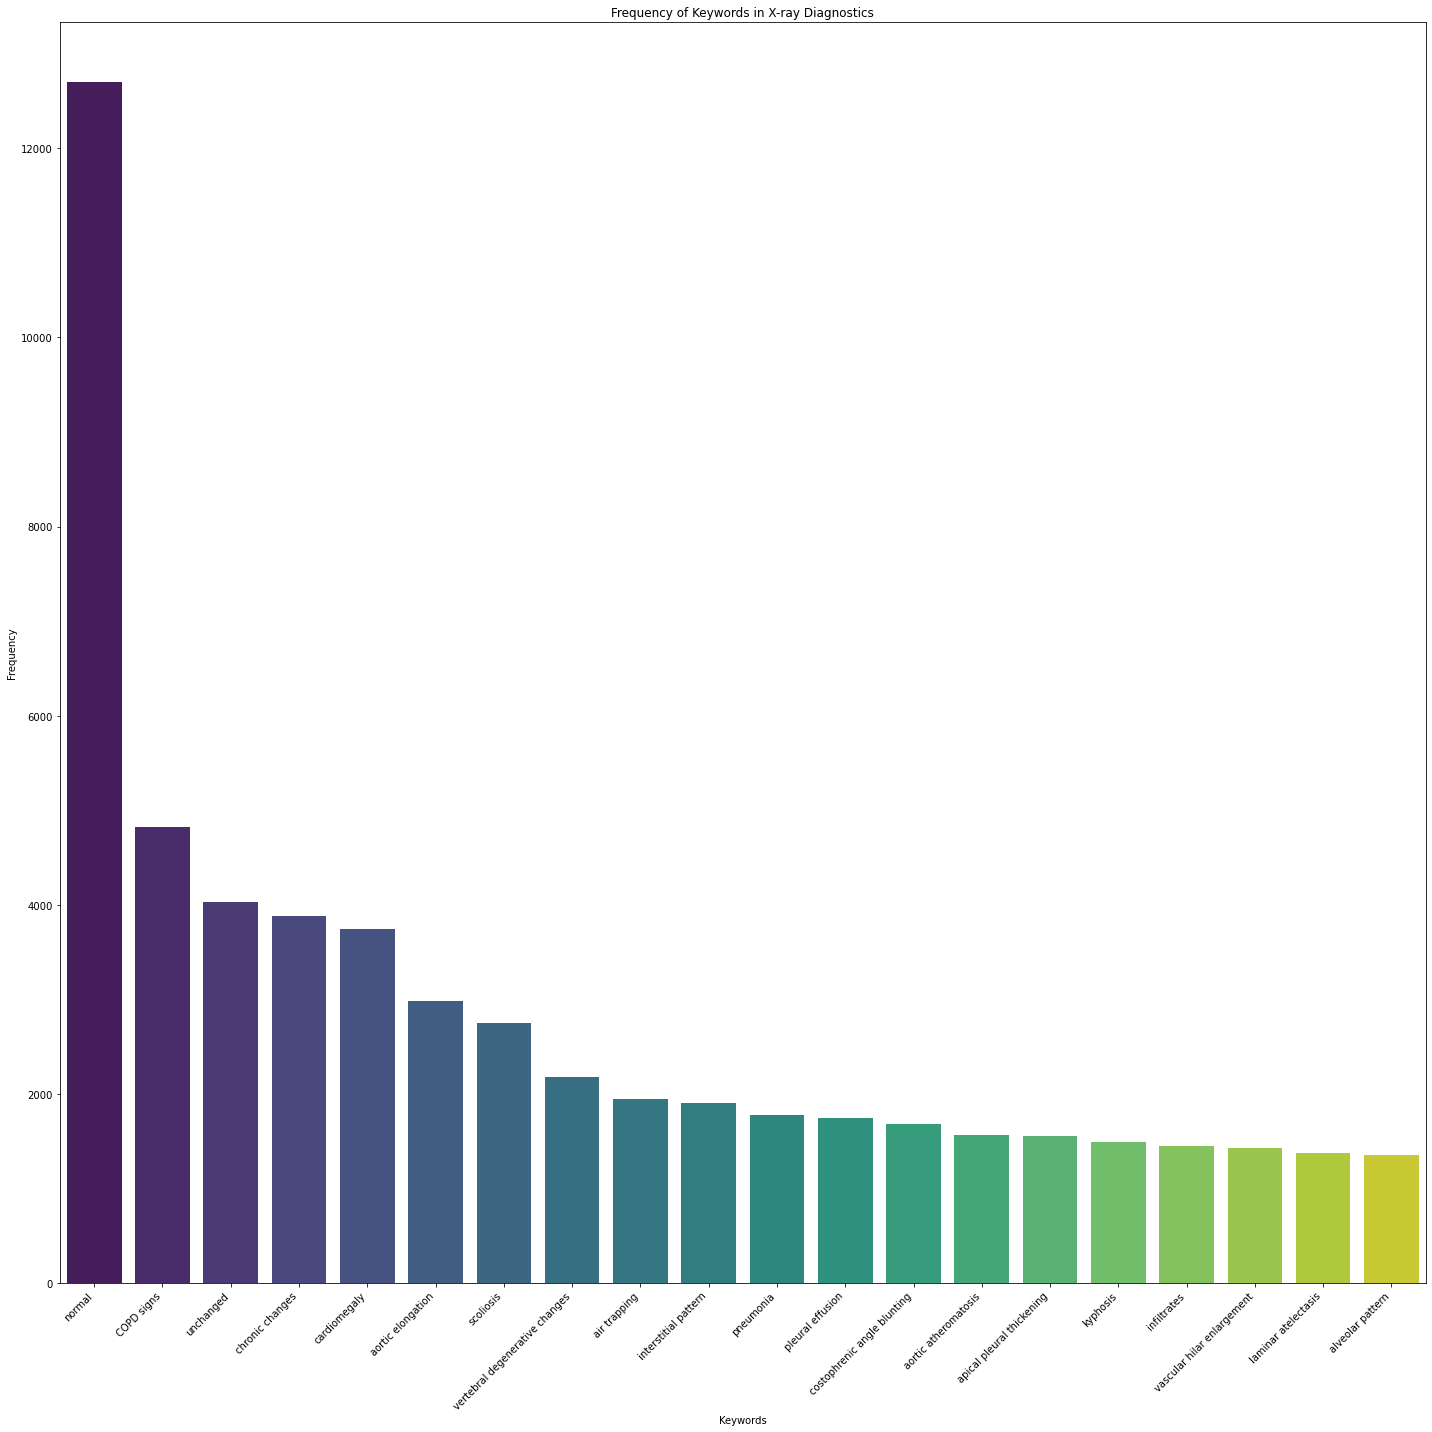

In [51]:
plt.figure(figsize=(20,20))
sns.barplot(x=top_20_count.index, y=top_20_count["Frequency"], palette="viridis")
plt.title('Frequency of Keywords in X-ray Diagnostics')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

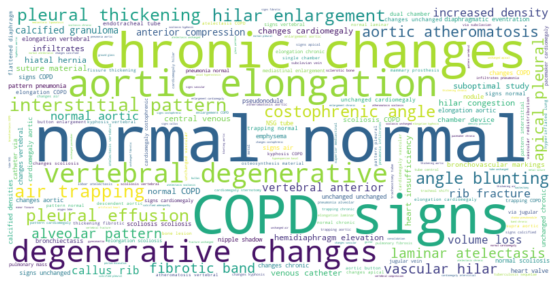

In [52]:
from wordcloud import WordCloud


wordcloud_text = ' '.join(keywords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

# K means Clustering


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer


long_title_TFIDF = TfidfVectorizer(max_df=0.5,
        min_df=5,lowercase = True, ngram_range = (1,2))


# Fit and Transfrom Text Data
TFIDF = long_title_TFIDF.fit_transform(keywords)

TFIDF.shape

(84913, 404)

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

cluster_labels = kmeans.fit_predict(TFIDF)

In [55]:
clusters = {}

for idx, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(keywords[idx])

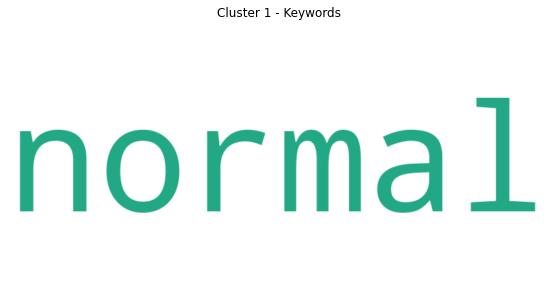

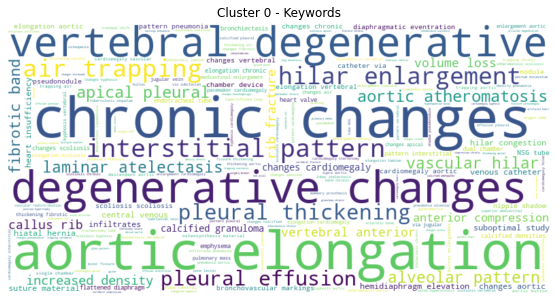

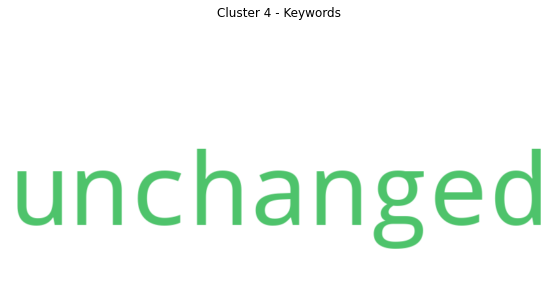

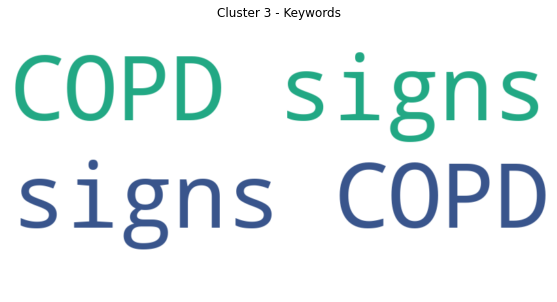

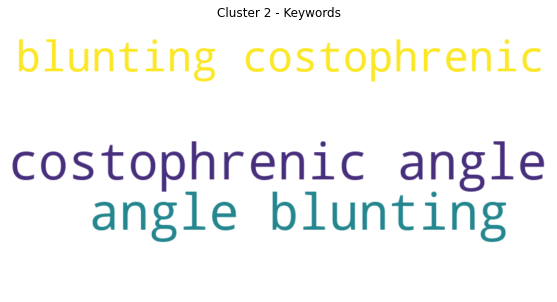

In [56]:
from wordcloud import WordCloud


for label, descriptions in clusters.items():
    wordcloud_text = ' '.join(descriptions)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {label} - Keywords")
    plt.axis('off')
    plt.show()

In [58]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 55.1/55.1 KB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 KB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 58.8/58.8 KB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 133.4/133.4 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 53.6/53.6 KB ? eta 0:00:00
     ---------------------------------------- 65.0/65.0 KB 3.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17429 sha256=efa2d26393ac62e12a5a1440afee4d93dcb49d65fa67f13f508f5e7b0186997e
  Stored in directory: c:\users\farhanhasan\appdata\local\pip\cache\wheels\c0\59\9f\7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: i

In [59]:
from googletrans import Translator
 
    # Initialize the translator
translator = Translator()

df_2['Report_Eng'] = df_2['Report'].apply(lambda x: translator.translate(x, src='es', dest='en').text)


df_2.head()

AttributeError: 'Translator' object has no attribute 'raise_Exception'